# DIANA FEA trial and error learning process

In [26]:
from geometry import plot_geometry

## Select target file

In [39]:
target_file = r"C:\Users\niels\API_FEM_Software\DIANA_code\DIANA_3D_testscript.py"

## Clear target file

In [40]:
open(target_file, 'w').close()

In [41]:
def append_script(diana_commands, target_file = target_file):
    
    """
    Appends DIANA commands to the bottom of a Python file.
    """
    
    try:
        with open(target_file, 'a') as file:
            for line in diana_commands:
                file.write(line + '\n')
        print(f"✅ DIANA commands successfully appended to '{target_file}'.")

    except Exception as e:
        print(f"❌ Error appending to file: {e}")


In [42]:
diana_3d = ['newProject("C:/Users/niels/DIANA_code/trial_3D", 1000, {} )',
'setModelAnalysisAspects( [ "STRUCT" ] )',
'setModelDimension( "3D" )',
'setGeneralizedPlaneStrainType( "OPLSHR" )',
'setDefaultMeshOrder( "LINEAR" )',
'setDefaultMesherType( "HEXQUAD" )']

In [43]:
append_script(diana_3d)

✅ DIANA commands successfully appended to 'C:\Users\niels\API_FEM_Software\DIANA_code\DIANA_3D_testscript.py'.


In [32]:
xmin = -15
xmax = 15
ymin = -20
ymax = 0.580

# Soil_I
y_kesp = -1.104 # [m] height of the kesp
y_GL = 0.58 # [m] ground level
y_A = -2.4 # [m]
x_A = (y_A - y_kesp)*3
y_B = -2 # [m]
x_B = (y_B - y_kesp)*3
x_C = xmax # [m]
y_C = y_B # [m]
x_D = xmax # [m]
y_D = y_A # [m]
Point_A = [x_A, y_A]
Point_B = [x_B, y_B]
Point_C = [x_D, y_C]
Point_D = [x_C, y_D]

# Soil_II
x_E, y_E = 0, y_kesp # [m], [m]
x_F, y_F = 2.4, y_kesp # [m], [m]
y_G = y_GL - 0.5 # [m]
x_G = x_F + (y_G - y_F)*3 # [m]
x_H, y_H = xmax, y_G # [m], [m]
Point_E = [x_E, y_E]
Point_F = [x_F, y_F]
Point_G = [x_G, y_G]
Point_H = [x_H, y_H]

# Soil_III
y_I = y_G # [m]
x_I = (y_I - y_E)*3 # [m]
x_H, y_H = xmax, y_G # [m], [m]
Point_I = [x_I, y_I]

# Soil_IV
x_J, y_J = 0.65, y_H # [m], [m]
x_K, y_K = x_J, y_kesp # [m], [m]
Point_J = [x_J, y_J]
Point_K = [x_K, y_K]

# Soil_V
x_L, y_L = x_J, y_GL # [m], [m]
x_M, y_M = xmax, y_GL # [m], [m]
Point_L = [x_L, y_L]
Point_M = [x_M, y_M]

# Wall
x_N, y_N = x_E, y_GL # [m], [m]
Point_N = [x_N, y_N]

# Kesp
x_O, y_O = -0.3, y_kesp # [m], [m]
Point_O = [x_O, y_O]

points = {
    "Point_A": Point_A,
    "Point_B": Point_B,
    "Point_C": Point_C,
    "Point_D": Point_D,
    "Point_E": Point_E,
    "Point_F": Point_F,
    "Point_G": Point_G,
    "Point_H": Point_H,
    "Point_I": Point_I,
    "Point_J": Point_J,
    "Point_K": Point_K,
    "Point_L": Point_L,
    "Point_M": Point_M,
    "Point_N": Point_N,
    "Point_O": Point_O}

polygons = [
    {"name": "Soil_I", "points": [Point_A, Point_B, Point_C, Point_D]},
    {"name": "Soil_II", "points": [Point_B, Point_E, Point_F, Point_G, Point_H, Point_C]},
    {"name": "Soil_III", "points": [Point_E, Point_I, Point_G, Point_F]},
    {"name": "Soil_IV", "points": [Point_K, Point_J, Point_G, Point_F]},
    {"name": "Soil_V", "points": [Point_J, Point_L, Point_M, Point_H]},
    {"name": "Wall", "points": [Point_E, Point_N, Point_L, Point_K]}]

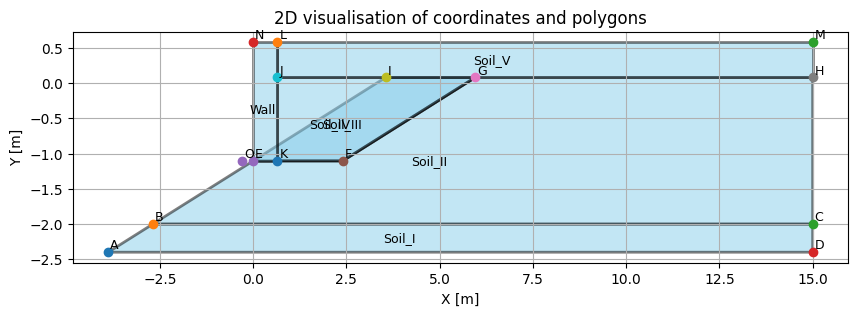

In [33]:
plot_geometry(points, polygons)

In [34]:
xmin = -15
xmax = 15
ymin = -20

# Define Y values for the top and bottom of each layer
y_levels = [-2.4, -5, -12, -12.5, -13, -15, -17, ymin]

# Create points for each layer (2 per y-level: left & right)
points_layers = {}
polygons_layers = []

# Generate point names: S1, S2, ..., S28
total_points = 7 * 4  # 7 polygons * 4 corners each
point_names = [f"Point_S{i+1}" for i in range(total_points)]

point_index = 0

for i in range(len(y_levels) - 1):
    top_y = y_levels[i]
    bottom_y = y_levels[i + 1]

    # Define the 4 points for this rectangle (polygon)
    p1 = [xmin, top_y]
    p2 = [xmax, top_y]
    p3 = [xmax, bottom_y]
    p4 = [xmin, bottom_y]

    # Store them with custom names
    names = []
    for pt in [p1, p2, p3, p4]:
        name = point_names[point_index]
        points_layers[name] = pt
        point_index += 1

In [35]:
def int_to_roman(n):
    numerals = {
        1: 'I', 4: 'IV', 5: 'V', 9: 'IX',
        10: 'X', 40: 'XL', 50: 'L',
        90: 'XC', 100: 'C', 400: 'CD',
        500: 'D', 900: 'CM', 1000: 'M'
    }
    result = ''
    for value in sorted(numerals.keys(), reverse=True):
        while n >= value:
            result += numerals[value]
            n -= value
    return result

In [36]:
polygons_layers = []

for i in range(len(points_layers) // 4):
    total_points = len(points_layers)
    point_names = [f"Point_S{i+1}" for i in range(total_points)]
    
    s1 = points_layers[point_names[i*4]]
    s2 = points_layers[point_names[i*4+1]]
    s3 = points_layers[point_names[i*4+2]]
    s4 = points_layers[point_names[i*4+3]]
    
    polygons_layers.append({
        "name": f"Soillayer_{int_to_roman(i+1)}",  # I, II, III, ...
        "points": [s1, s2, s3, s4]
    })

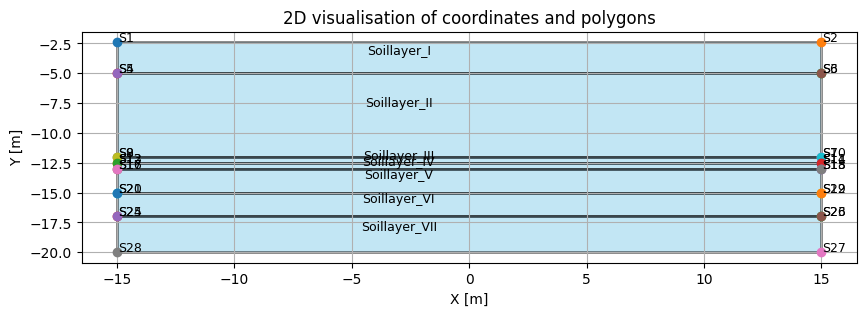

In [37]:
plot_geometry(points_layers, polygons_layers)

## Create block in 3D model
createBlock( "Block 1", [ 0, 0, 0 ], [ 1, 1, 1 ] )

In [ ]:
def generate_blocks(blocks):
    output_lines = []
    for i, block in enumerate(blocks):
        block_name =block["name"]
        points_str_position = ", ".join(f"[ {x}, {y}, {z} ]" for x, y, z in block["position"])
        points_str_size = ", ".join(f"[ {dx}, {dy}, {dz} ]" for dx, dy, dz in block["size"])
        line = f'createBlock("{block_name}", [ {points_str_position} ], [ {points_str_size} ])'
        output_lines.append(line)
        print(line)
    return output_lines

NameError: name 'createBlock' is not defined